In [4]:
import cv2

def demonstrate_properties(cap):
    """
    Test and display OpenCV properties of the video capture device.
    """
    # List of properties to demonstrate
    properties = {
        "CAP_PROP_POS_MSEC": cv2.CAP_PROP_POS_MSEC,
        "CAP_PROP_POS_FRAMES": cv2.CAP_PROP_POS_FRAMES,
        "CAP_PROP_POS_AVI_RATIO": cv2.CAP_PROP_POS_AVI_RATIO,
        "CAP_PROP_FRAME_WIDTH": cv2.CAP_PROP_FRAME_WIDTH,
        "CAP_PROP_FRAME_HEIGHT": cv2.CAP_PROP_FRAME_HEIGHT,
        "CAP_PROP_FPS": cv2.CAP_PROP_FPS,
        "CAP_PROP_FOURCC": cv2.CAP_PROP_FOURCC,
        "CAP_PROP_FRAME_COUNT": cv2.CAP_PROP_FRAME_COUNT,
        "CAP_PROP_BRIGHTNESS": cv2.CAP_PROP_BRIGHTNESS,
        "CAP_PROP_CONTRAST": cv2.CAP_PROP_CONTRAST,
        "CAP_PROP_SATURATION": cv2.CAP_PROP_SATURATION,
        "CAP_PROP_HUE": cv2.CAP_PROP_HUE,
        "CAP_PROP_GAIN": cv2.CAP_PROP_GAIN,
        "CAP_PROP_EXPOSURE": cv2.CAP_PROP_EXPOSURE,
        "CAP_PROP_CONVERT_RGB": cv2.CAP_PROP_CONVERT_RGB,
        "CAP_PROP_ZOOM": cv2.CAP_PROP_ZOOM,
        "CAP_PROP_FOCUS": cv2.CAP_PROP_FOCUS,
        "CAP_PROP_AUTO_EXPOSURE": cv2.CAP_PROP_AUTO_EXPOSURE,
        "CAP_PROP_AUTO_WB": cv2.CAP_PROP_AUTO_WB,
    }

    print("\nTesting Video Capture Properties:")
    for prop_name, prop_id in properties.items():
        value = cap.get(prop_id)
        if value == -1:
            print(f"{prop_name}: Not supported by this device.")
        else:
            print(f"{prop_name}: {value}")


def real_time_demo(cap):
    """
    Demonstrates real-time properties while playing the video/camera feed.
    """
    print("\nReal-Time Video Properties Demonstration (Press 'q' to exit):")
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video or no frames to capture.")
            break

        # Display the current frame
        current_time = cap.get(cv2.CAP_PROP_POS_MSEC)
        current_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

        # Show the video frame
        cv2.imshow("Video", frame)
        print(f"Time: {current_time:.2f} ms | Frame: {current_frame}/{total_frames:.0f}", end="\r")

        # Press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


def unsupported_properties_section():
    """
    Highlights properties that are hard to demonstrate in a standard environment.
    """
    print("\nProperties Not Demonstrated Directly:")
    unsupported_properties = {
        "CAP_PROP_WHITE_BALANCE_BLUE_U": "Not widely supported.",
        "CAP_PROP_RECTIFICATION": "Specific to stereo cameras.",
        "CAP_PROP_MONOCHROME": "Device-dependent; not commonly supported.",
        "CAP_PROP_SHARPNESS": "Requires specific hardware.",
        "CAP_PROP_TRIGGER": "Relevant for hardware triggers (e.g., industrial cameras).",
        "CAP_PROP_TRIGGER_DELAY": "Hardware-specific.",
        "CAP_PROP_TEMPERATURE": "Depends on thermal cameras.",
        "CAP_PROP_GUID": "Used for device identification.",
        "CAP_PROP_IRIS": "Applicable to advanced cameras with iris control.",
        "CAP_PROP_SETTINGS": "Opens camera settings dialog (Windows-only).",
    }

    for prop, description in unsupported_properties.items():
        print(f"{prop}: {description}")


# Main script
if __name__ == "__main__":
    # Video source (0 for webcam, or provide a video file path)
    video_source = 1  # Replace with 'sample_video.mp4' for video file
    cap = cv2.VideoCapture(video_source)

    if not cap.isOpened():
        print("Error: Could not open video source.")
        exit()

    print(f"Using backend: {cap.getBackendName()}")

    # Demonstrate properties
    demonstrate_properties(cap)

    # Real-time demonstration
    real_time_demo(cap)

    # Close video capture and windows
    cap.release()
    cv2.destroyAllWindows()

    # Unsupported properties section
    unsupported_properties_section()

Using backend: MSMF

Testing Video Capture Properties:
CAP_PROP_POS_MSEC: 0.0
CAP_PROP_POS_FRAMES: 0.0
CAP_PROP_POS_AVI_RATIO: Not supported by this device.
CAP_PROP_FRAME_WIDTH: 640.0
CAP_PROP_FRAME_HEIGHT: 480.0
CAP_PROP_FPS: 15.0
CAP_PROP_FOURCC: 22.0
CAP_PROP_FRAME_COUNT: Not supported by this device.
CAP_PROP_BRIGHTNESS: 8.0
CAP_PROP_CONTRAST: 9.0
CAP_PROP_SATURATION: 8.0
CAP_PROP_HUE: 0.0
CAP_PROP_GAIN: 8.0
CAP_PROP_EXPOSURE: -7.0
CAP_PROP_CONVERT_RGB: 1.0
CAP_PROP_ZOOM: Not supported by this device.
CAP_PROP_FOCUS: 0.0
CAP_PROP_AUTO_EXPOSURE: 0.0
CAP_PROP_AUTO_WB: Not supported by this device.

Real-Time Video Properties Demonstration (Press 'q' to exit):
Time: 30424845.08 ms | Frame: 0.0/-1
Properties Not Demonstrated Directly:
CAP_PROP_WHITE_BALANCE_BLUE_U: Not widely supported.
CAP_PROP_RECTIFICATION: Specific to stereo cameras.
CAP_PROP_MONOCHROME: Device-dependent; not commonly supported.
CAP_PROP_SHARPNESS: Requires specific hardware.
CAP_PROP_TRIGGER: Relevant for hardwar

In [ ]:
import cv2
def list_available_cameras(max_cameras=5):
    available = []
    for idx in range(max_cameras):
        cap = cv2.VideoCapture(idx)
        if cap.isOpened():
            available.append(idx)
            cap.release()
    print("Beschikbare camera's:", available)

list_available_cameras()
camera = cv2.VideoCapture(1)  # Maak verbinding met camera ID 1

# Stel een vaste belichtingstijd in (indien ondersteund)
camera.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0)  # Auto-exposure uit (driver-afhankelijk)
camera.set(cv2.CAP_PROP_EXPOSURE, -5)
camera.set(cv2.CAP_PROP_AUTO_WB, 0)         # Handmatige belichting (waarde afhankelijk van driver)

while True:
    retval, frame = camera.read()
    if not retval:
        break

    # Toon live beeld in een venster
    cv2.imshow("Live feed", frame)

    # Stoppen als je op 'q' drukt
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


In [ ]:
# Foto
import matplotlib.pyplot as plt

camera = cv2.VideoCapture(1) # Maak verbinding met int : camera id

camera.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0.25)  # Auto-exposure uit (driver-afhankelijk)
camera.set(cv2.CAP_PROP_EXPOSURE, -5)       # Handmatige belichting (waarde afhankelijk van driver)

retval, frame = camera.read() # lees de camera uit

plt.imshow(frame) # geef het uitgelezen frame weer

camera.release() # verbreek de verbinding met de camera

In [ ]:
import skimage


grayscale = skimage.color.rgb2gray(frame) # RGB -> grayscale

I = grayscale.sum(axis=0) # row wise summation


plt.subplot(2,1,1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim() # grab min max values from imshow

plt.subplot(2,1,2)
plt.plot(I, c='black')

plt.xlim(xmin,xmax) # set min max values

plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")

In [ ]:
import numpy as np

I_frame = grayscale.sum() # sommatie van één frame
print("Totale intensiteit: " + I_frame)

I_0 = 1

def absorptie(I, I_0):
    return -np.log(I / I_0)

print("Absorptie: ", absorptie(I_frame, I_0))

SyntaxError: unterminated string literal (detected at line 2) (3892418137.py, line 2)

Text(0, 0.5, 'Concentratie [mg/L]')

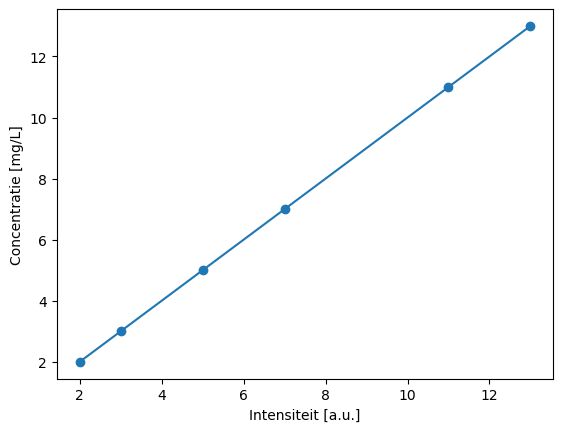

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

absorptie_array = np.array([2,3,5,7,11,13])
consentratie_array = np.array([2,3,5,7,11,13]) 
intensieit_array = np.array([2,3,5,7,11,13])

plt.plot(absorptie_array, consentratie_array,  marker='o')
plt.xlabel("Intensiteit [a.u.]")
plt.ylabel("Concentratie [mg/L]")

a = 1.0 b = 0.0


Text(0, 0.5, 'Concentratie [mg/L]')

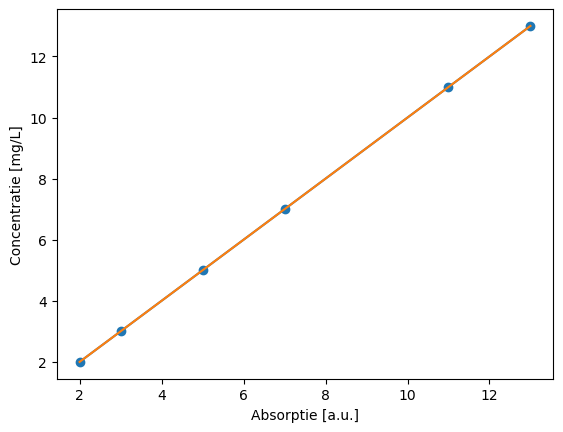

In [21]:
from scipy.optimize import curve_fit

def trendlijn(x , a, b):
    return a * x + b

popt, pcov = curve_fit(trendlijn, absorptie_array, consentratie_array)
consentratie_fit_y = trendlijn(absorptie_array, *popt)

print("a =", popt[0], "b =", popt[1])
a = popt[0]
b = popt[1]

plt.plot(absorptie_array, consentratie_array, marker='o')
plt.plot(absorptie_array, consentratie_fit_y)
plt.xlabel("Absorptie [a.u.]")
plt.ylabel("Concentratie [mg/L]")

In [ ]:
def onbekende_concentratie(A_onbekend):
    return a * A_onbekend + b

A_onbekend = 6

print("De onbekende concentratie is:", onbekende_concentratie(A_onbekend))

Onbekende concentratie: 6.0
